# Python programming basics for MATH327
This notebook demonstrates all the Python programming tools you'll need for the MATH327 computer project.

If you're new to [Python](https://www.python.org), or programming in general, the official "[Beginner's Guide](https://wiki.python.org/moin/BeginnersGuide)" is very useful.  It provides tutorials both for those who have never programmed before as well as for those with previous programming experience.  [Software Carpentry](https://software-carpentry.org) also provides two tutorials on Python [programming](https://swcarpentry.github.io/python-novice-inflammation/) and [plotting](http://swcarpentry.github.io/python-novice-gapminder/), with a focus on scientific research.

That said, all necessary information should appear here, so those additional tutorials are entirely optional resources.  I suggest using Python in part because it is [much easier to work with](https://xkcd.com/353/) than some other programming frameworks.  It is also free and very widely used, making it a very valuable skill to encounter in the course of your studies.  We are also going to keep things simple --- only a few dozen lines of code will be required for any task in the project, where a "line of code" is essentially an instruction telling the computer what we want it to do.

The notebook model for running and sharing code is very popular, as it allows us to mix formatted explanations (like these) with program execution and graphics.  Google's [Colaboratory](https://colab.research.google.com) is one of a number of online services that host and run notebooks.  If you have a Google account, you can save and edit a copy of this notebook, and run it for free on a machine sitting in the Google Cloud.  Alternatively, you can grab the notebook from the [GitHub repository](https://github.com/daschaich/MATH327_2024/tree/main/computer_project) for the module and run it wherever you like --- the Python Beginner's Guide [summarizes a large number of options](https://wiki.python.org/moin/PythonEditors).  The [plain Python code](https://github.com/daschaich/MATH327_2024/blob/main/computer_project/demo.py) is also available in the repository.

# Initialization
Much of Python's power comes from a wide range of packages that provide useful tools.  We can access these using the `import` command as shown below.  We can also import the package `as` a convenient nickname.  Let's import four packages:
* The `math` package provides extra mathematical capabilities, of which we're only going to use its square-root function (`math.sqrt`).
* The `random` package makes it easy to to work with the pseudo-random numbers discussed in the project assignment.
* The [NumPy](https://numpy.org) package simplifies numerical computing in Python.
* [Matplotlib](https://matplotlib.org) simplifies Python plotting.

In [ ]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt   # Convenient nickname

One thing to note in the code above is that everything appearing after the `#` symbol is a comment that Python will ignore.  Such comments are very useful to help humans understand what the code is doing, and I encourage you to make use of them.


# Pseudo-random numbers
Now that Python is up and running, we can immediately start generating pseudo-random numbers and making use of them.

First we initialize our pseudo-random number generator (PRNG) with an explicit "seed" (in this case `42`) so that our work is easily reproducible.  Each call of the `random.random()` function then generates a pseudo-random number $u$ from a uniform distribution, $p(u) = 1$, where $0 \leq u < 1$ so that $\int p(u) du = 1$ as required for a well-behaved probability distribution.

As shown below, we can save the value of this pseudo-random number in a variable (here `u`) for later use.  We can also call the PRNG directly from within Python's built-in `print` utility.  By default, these `print` statements display 16-digit numbers, which is generally many more digits than would be useful to see.  We can improve on this default behaviour by telling `print` how we want its output to be formatted.  There is an example below, and much more information in [this tutorial](https://docs.python.org/3/tutorial/inputoutput.html).

In [ ]:
random.seed(42)
u = random.random()
print(u)
print(random.random())

# Print both English text and general ('g') numbers,
# displaying six significant figures after each decimal point
# 'u' remains what it was set to be above!
print("Pseudo-random numbers: %.6g and %.6g" % (u, random.random()))

0.6394267984578837
0.025010755222666936
Pseudo-random numbers: 0.639427 and 0.275029


# Inverse transform sampling and the 'for' loop
Now let's do something non-trivial.  We will generate 1,000,000 pseudo-random numbers $x$ distributed according to $p(x) = \frac{x}{2}$, with $0 \leq x < 2$ so that $\int p(x) dx = 1$ like a well-behaved probability distribution.  Based on the background information in the project assignment, **you should check** that inverse transform sampling with $x = F(u) = 2\sqrt{u}$ will give us this $p(x)$.

To call `random.random()` (or do anything else) many times, we use the "[for loop](https://en.wikipedia.org/wiki/For_loop)" shown below.  The for loop is a key programming concept.  In Python such loops begin with a colon (`:`) and last so long as the following lines are indented.  (Unlike most other programming languages, in Python [whitespace matters](https://xkcd.com/353/).)  

In the code below, we first re-seed the PRNG.  This means the first three pseudo-random numbers $u$ we generate will repeat the three printed above.  We then define the number of samples to be `nSamples = int(1e6)`, which tells Python that we want it to consider "1e6" to be the **int**eger $1\times10^6 = 1{,}000{,}000$.

In the loop we will do two things: Save every pseudo-random numbers in an **array** named `data`, and also accumulate **running sums** that more efficiently provide the mean $\mu = \langle x\rangle$ and standard deviation $\sigma = \sqrt{\langle x^2\rangle - \langle x\rangle^2}$.  (We will make use of the array later.)  We initialize the array to be empty (`[]`), and then `append` each pseudo-random number to its end.  The notation `[-1]` picks out the last entry in the array --- the one that we just appended.

We then run the loop, which repeats every indented instruction `nSamples` times, once for each value of `i`$ = 0$, $1$, $\cdots$, `nSamples`$ - 1$.  In this particular loop the value of `i` is not relevant.

For this example **you should check** that the exact analytic results are $\mu = \frac{4}{3}$ and $\sigma = \frac{\sqrt{2}}{3} \approx 0.4714045$.  We can see that 1,000,000 samples quickly produce numerical results that match the exact values to three or four significant figures.

In [ ]:
random.seed(42)
nSamples = int(1e6)
data = []
ave = 0.0
sqAve = 0.0
for i in range(0, nSamples):
  data.append(2.0 * math.sqrt(random.random()))
  ave += data[-1]     # Add to running sums
  sqAve += data[-1] * data[-1]

ave /= nSamples
sqAve /= nSamples
sigma = math.sqrt(sqAve - ave * ave)
print("mu = %.6g" % ave)
print("sigma = %.6g" % sigma)

# Check against exact analytic results
exact_mu = 4.0 / 3.0
diff = 100.0 * np.abs(1.0 - ave / exact_mu)       # Absolute value
print("\nMean within %.2g percent of exact result" % diff)

exact_sigma = math.sqrt(2.0) / 3.0
diff = 100.0 * np.abs(1.0 - sigma / exact_sigma)  # Overwrites diff
print("StDev within %.2g percent of exact result" % diff)

mu = 1.33345
sigma = 0.47113

Mean within 0.0089 percent of exact result
StDev within 0.058 percent of exact result


As an aside, if all the data are saved in an array, we can exploit some useful utilities offered by NumPy to compute the mean and standard deviation, rather than using the (more efficient) running sums:

In [ ]:
print("Mean check: %.6g" % np.mean(data))
print("StDev check: %.6g" % np.std(data))

Mean check: 1.33345
StDev check: 0.47113


# Histogram
If all we wanted were the mean and standard deviation, storing all 1,000,000 pseudo-random numbers in the array `data` would be extremely inefficient.  Here we stored them so that we can make a [histogram](https://en.wikipedia.org/wiki/Histogram) to visually check how well the pseudo-random numbers Python gave us follow the desired probability distribution $p(x) = \frac{x}{2}$.

The `plt.hist` function below produces this histogram, sorting the data in the array into the 51 bins we tell it to use.  The `density` argument normalizes the plot so that the area of the histogram adds up to $1$.  If `density` were set to false, the histogram would show the _total number_ of samples in each bin and we would need to rescale $p(x)$ by an appropriate constant factor in order to compare it to the data.

Here the comparison is done by evaluating the function $y(x) = \frac{x}{2}$ for 200 points evenly distributed between $0 \leq x < 2$ (provided by the useful NumPy utility `arange`).  This is a standard way to plot functions in Python.  The `plt.plot` function adds this $y(x)$ to the plot that already contains the histogram, which we can then save to disk as a pdf file and also `show` interactively.  ([Note](https://stackoverflow.com/a/21884187/2588546) that `show` resets the plot, so we need to save it *first*.)  The `'r'` argument given to `plt.plot` tells Matplotlib to show $y$ as a red line.  We see very good agreement between the histogram and the desired $p(x) = \frac{x}{2}$.

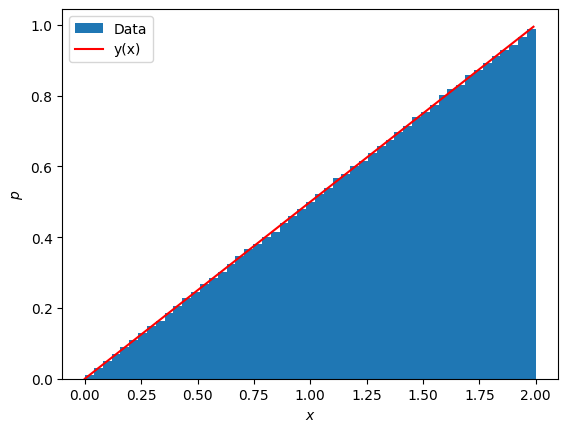

In [ ]:
nbins = 51
plt.hist(data, nbins, density=True, label='Data')
x = np.arange(0, 2, 0.01)   # Points 0, 0.01, ..., 1.99
y = 0.5 * x
plt.plot(x, y, 'r', label='y(x)')
plt.xlabel('$x$')
plt.ylabel('$p$')
plt.legend(loc='upper left')

# Save and/or show figure
# 'tight' reduces surrounding whitespace
plt.savefig('hist.pdf', bbox_inches='tight')
plt.show()

# Random walks
Now let's analyze random walks with various numbers of steps.  As shown in the code below, this requires nesting three `for` loops inside of each other, with increasing indentation.  The innermost loop over `step` carries out the walk, taking `Nstep` steps of random length $x$ drawn from the probability distribution $p(x)$ above, and adding these steps to the running sum `d` (for "distance").  In the middle loop over `i`, this `nStep` random walk is repeated `nWalks = int(1e5)` times, giving us 100,000 values of `d` to analyze as a random variable.  We save the average `d` in the array `L`, which is built up through the outermost loop over `Nstep` that repeats the procedure for reach of the eight numbers of steps we assign to the array `walk_lengths`.

To confirm that the average walk length follows our expectation `L`$\propto$`Nstep`, we both print out and plot our results.

N  L
10 13.332
20 26.654
30 40.002
40 53.319
50 66.667
60 79.997
70 93.328
80 106.656


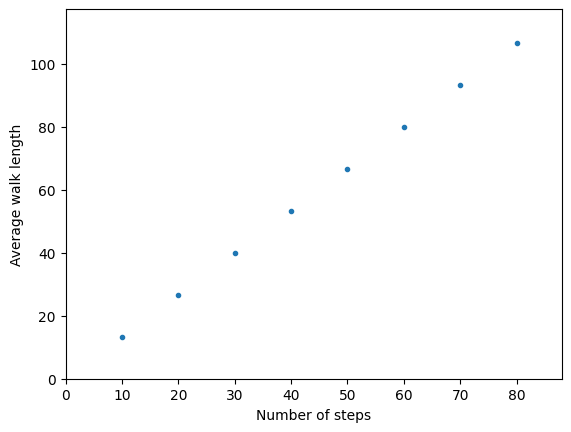

In [ ]:
walk_lengths = [10, 20, 30, 40, 50, 60, 70, 80]
nWalks = int(1e5)     # Number of times to repeat each walk
L = []
print("N  L")
for Nstep in walk_lengths:
  L.append(0.0)     # Array of running sums
  for i in range(0, nWalks):
    d = 0.0         # Single running sum
    for step in range(0, Nstep):
      d += 2.0 * math.sqrt(random.random())
    L[-1] += d
  L[-1] /= float(nWalks)
  print("%d %.3f" % (Nstep, L[-1]))

# Plot as small points (".") instead of a line
# Force the plot to include the origin
plt.xlim(0, 1.1*max(walk_lengths))
plt.ylim(0, 1.1*max(L))
plt.xlabel('Number of steps')
plt.ylabel('Average walk length')
plt.plot(walk_lengths, L, linestyle='None', marker=".")
plt.show()

As an aside, if we were pressed for time, we could do just the $10^5$ 80-step walks above, and interpret the first $N$ steps of each of these as an $N$-step walk.  This would produce **correlated** results, but we would only need to account for correlations if we were carrying out careful uncertainty analyses, which we won't worry about in this module.

# Polynomial fit
Suppose we are confident that `L` is a linear function of `Nstep`, $L = aN + b$, and just want to determine the slope $a$ and intercept $b$.  We can do this by using NumPy's `np.polyfit` function to fit these data to a polynomial.  The order of the polynomial (here `1`) is the third argument of this function.  By printing the output of this function, we can confirm our expectation that the slope is simply the mean of the single-step process, $\mu = \frac{4}{3}$, while the intercept correctly vanishes up to our current statistical precision.  (Zero steps means zero distance walked!)

We can also plot the results of the fit along with the data points already shown above, to confirm that the fit provides a good description of these data.

a = 1.33329
b = -0.00362553


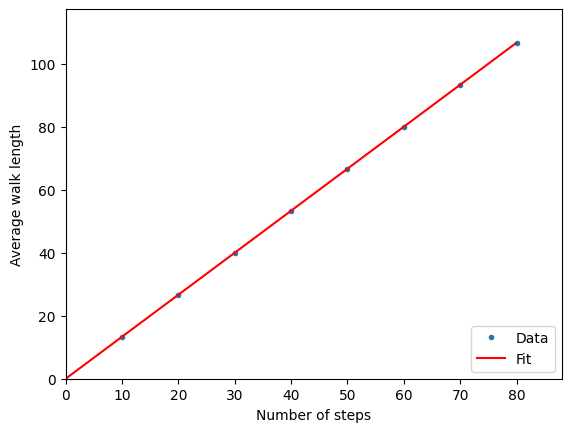

In [ ]:
output = np.polyfit(walk_lengths, L, 1)
a=output[-2]
b=output[-1]
print("a = %.6g" % a)
print("b = %.6g" % b)

# Replot the points, since show() reset the previous plot
plt.xlim(0, 1.1*max(walk_lengths))
plt.ylim(0, 1.1*max(L))
plt.xlabel('Number of steps')
plt.ylabel('Average walk length')
plt.plot(walk_lengths, L, linestyle='None', marker=".", label="Data")
x = np.arange(0, 80, 0.1)
p = a * x + b
plt.plot(x, p, 'r', label="Fit")
plt.legend(loc='lower right')
plt.show()

# Trick to simplify power-law fits
What if we *aren't* sure that the relation between the walk length and the number of steps is linear?  We know the intercept must be zero, so we can proceed by fitting the data to a **power law**, $L = cN^{\alpha}$, to determine both the power $\alpha$ and the constant of proportionality $c$.

It is of course possible to do such power-law fits directly in Python, but there is also a famous trick that makes this task much simpler: We take the log of both sides of the power law, and get back to a linear relation, $\log L = \alpha \log N + \log c$.  Adapting the linear fit above then confirms that $\alpha = 1$ and $c = \mu$ well within our statistical uncertainties.

alpha = 1.00007
c = 1.33286


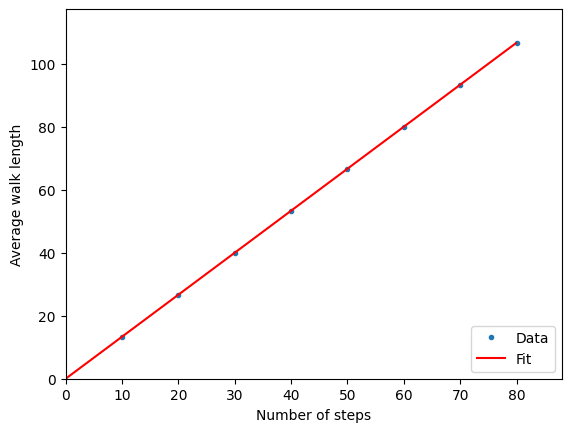

In [ ]:
logN = np.log(walk_lengths);
logL = np.log(L);
output = np.polyfit(logN, logL, 1)
alpha = output[-2]
c = np.exp(output[-1])
print("alpha = %.6g" % alpha)
print("c = %.6g" % c)

plt.xlim(0, 1.1*max(walk_lengths))
plt.ylim(0, 1.1*max(L))
plt.xlabel('Number of steps')
plt.ylabel('Average walk length')
plt.plot(walk_lengths, L, linestyle='None', marker=".", label="Data")
x = np.arange(0, 80, 0.1)
p = c * x**alpha
plt.plot(x, p, 'r', label="Fit")
plt.legend(loc='lower right')
plt.show()

# Time to play
You now have all the tools you need for the computer project, but there are plenty of experiments you can run based on the setup above.

For one thing, we expect the accuracy with which we reproduce the exact analytic results to improve with more data (larger `nSamples` and `nWalks`).  You can easily check whether this expectation is fulfilled by re-running the code above with larger (or smaller) `nSamples` or `nWalks`.

When generating the random walks, you can explore the effects of correlations by using the trick of extracting shorter walks from the longest 80-step walk, and see how much this speeds up the computations.

You can also explore how higher-order terms in the polynomial would affect the fit, and check the trick above against a direct power-law fit.

You can also consider different distributions of step sizes, for example generalizing this setup to walks in two (or more) dimensions by generating both pseudo-random step lengths and one or more pseudo-random angles defining the direction of each step.